**NOTE: This file also contains visualizations from Tableau, so just hover over them to get more insights from the viz.**

In [9]:
#importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns        #advance visualization

import warnings
warnings.filterwarnings('ignore')   #If there are any warnin

In [10]:
loan = pd.read_excel("loan.xlsx")     #loading the data from the excel file
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
print(loan.shape)  
print(loan.columns)

(39717, 111)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


Populating the interactive namespace from numpy and matplotlib


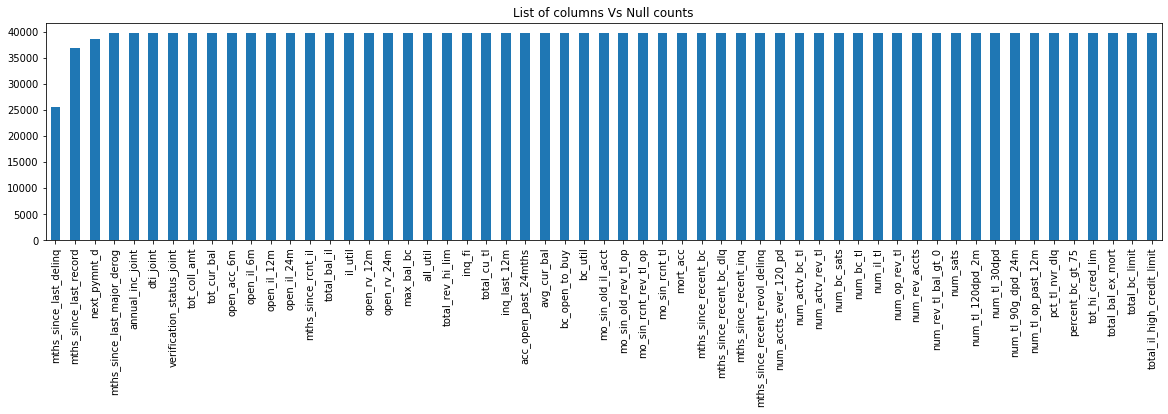

In [12]:
#Some columns in the table have many null values, so these columns don't provide us any information 

%pylab inline
null_columns = loan.isnull().sum()  # to find the number of null values in each column
null_columns = null_columns[null_columns.values > (0.33*len(loan))]
plt.figure(figsize(20,4))
null_columns.plot(kind='bar')
plt.title('List of columns Vs Null counts')
plt.show()

**Insights :**
From the above graph we can see that there are 30+ columns which are having more than 33% of their values as Null.
So these columns are not useful and hence we will remove them from our dataframe

In [13]:
limitPer = len(loan)*0.33
loan = loan.dropna(thresh=limitPer,axis=1)   #dropping alll those columns which have more than 33% null values in them
print(loan.shape)
loan.columns

(39717, 55)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [14]:
#There are some columns which have same values in all the rows, so as they are not conveying any useful information
#We will also remove them from the dataframe

nunique = loan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
loan_new = loan.drop(cols_to_drop, axis=1)
print(loan_new.shape)
loan_new.head(2)

(39717, 46)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0


-  By removing the columns containing null values and same values we reduced the dimensionality of the data from **111** columns to **46** columns.
-  This will make visualizing the data more easy

# Why do people take loans?

In [26]:
%%HTML
<div class='tableauPlaceholder' id='viz1561752858676' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561752858676');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
1. Debt consolidation is the major reason for the people to take loan.
2. Credit card, home_improvement, car, small buisness are the other most popular reasons for taking a loan.

# UNIVARIATE ANALYSIS

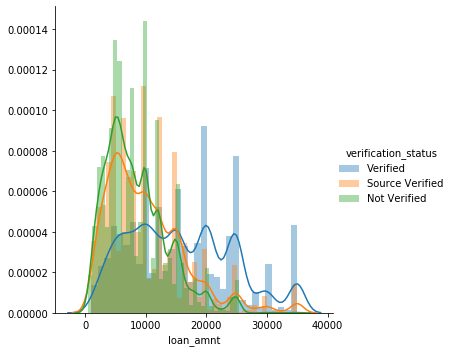

In [15]:
#Density Plot`
sns.FacetGrid(loan_new, hue="verification_status", size=5) \
   .map(sns.distplot, "loan_amnt") \
   .add_legend();
plt.show();

#y axis shows the probability density and hence it can be greatere than 1

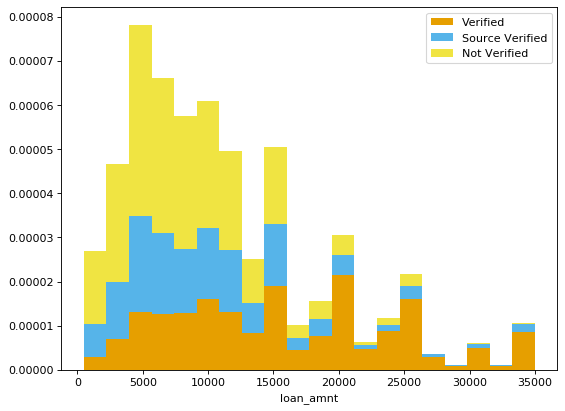

In [16]:
# Make a separate list for each verification_status
x1 = list(loan_new[loan_new['verification_status'] == 'Verified']['loan_amnt'])
x2 = list(loan_new[loan_new['verification_status'] == 'Source Verified']['loan_amnt'])
x3 = list(loan_new[loan_new['verification_status'] == 'Not Verified']['loan_amnt'])


# Assign colors for each verification and status and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Verified','Source Verified','Not Verified']

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Stacked histogram with 3 verification_status
plt.hist([x1, x2, x3], bins = int(200/10), stacked=True,
         normed=True, color = colors, label=names)

plt.legend()
plt.xlabel('loan_amnt')
plt.show()

**Insights :**
The above graphs show that the verified individuals are more likely to get bigger amount as a loan than the others.

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1561577477609' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet14&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet14' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet14&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577477609');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='70%';vizElement.style.height=(divElement.offsetWidth*0.5)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1561577708829' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet17&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet17' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet17&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577708829');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='70%';vizElement.style.height=(divElement.offsetWidth*0.5)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Insights : Most of the interest rates are distributed between 9.25% to 14.59%

In [28]:
%%HTML
<div class='tableauPlaceholder' id='viz1561577323858' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet13&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet13' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet13&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577323858');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='70%';vizElement.style.height=(divElement.offsetWidth*0.5)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
<div class='tableauPlaceholder' id='viz1561577797310' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet18&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet18' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet18&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577797310');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='70%';vizElement.style.height=(divElement.offsetWidth*0.5)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
Most of the loan amounts are distributed between 5500 to 15000

In [29]:
%%HTML
<div class='tableauPlaceholder' id='viz1561577221562' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet9&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet9' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet9&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577221562');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
1. The number of people taking loans increases year by year.
2. As the year increases(2007-2011) the no. of Charged off records also increases.

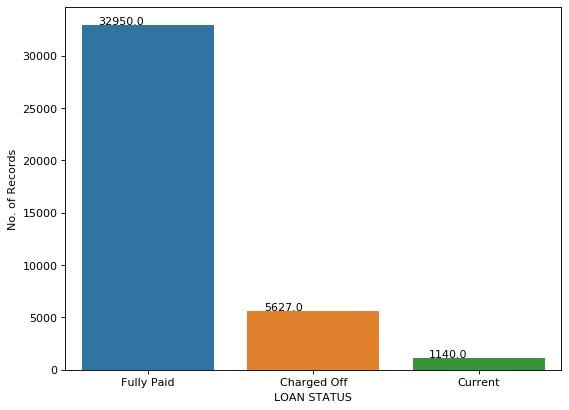

In [17]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.countplot(x='loan_status',data=loan_new)
plt.title('')
plt.xlabel('LOAN STATUS')
plt.ylabel('No. of Records')
 
for p in ax.patches:                            # To get the height of the bars
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Insights :

No. of people fully paid the loan = 32950

No. of people Charged off = 5627

No. of people currently paying the loan = 1140

# BIVARIATE ANALYSIS

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1561577076288' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577076288');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
The loan amount increased year by year (2007 - 2011)

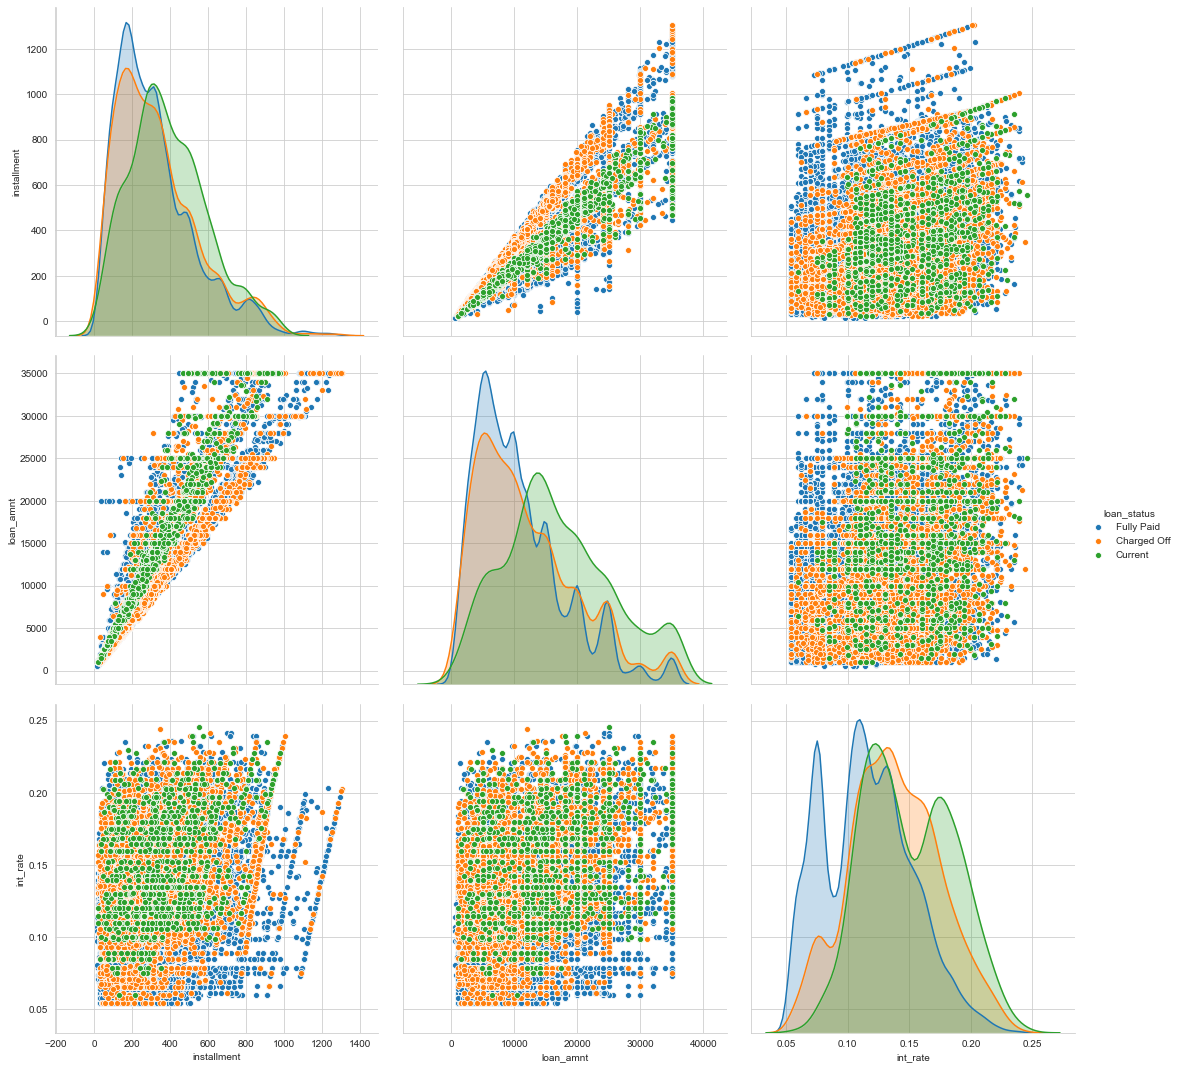

In [18]:
# Pair plot
# NOTE: The diagonal elements are PDFs for each feature

sns.set_style("whitegrid");
sns.pairplot(loan_new, vars=['installment','loan_amnt','int_rate'], hue="loan_status", size=5);
plt.show()

**Insights :**
1. As the loan amount increases the interest rate also increases

   We cannot get anything else from these graphs

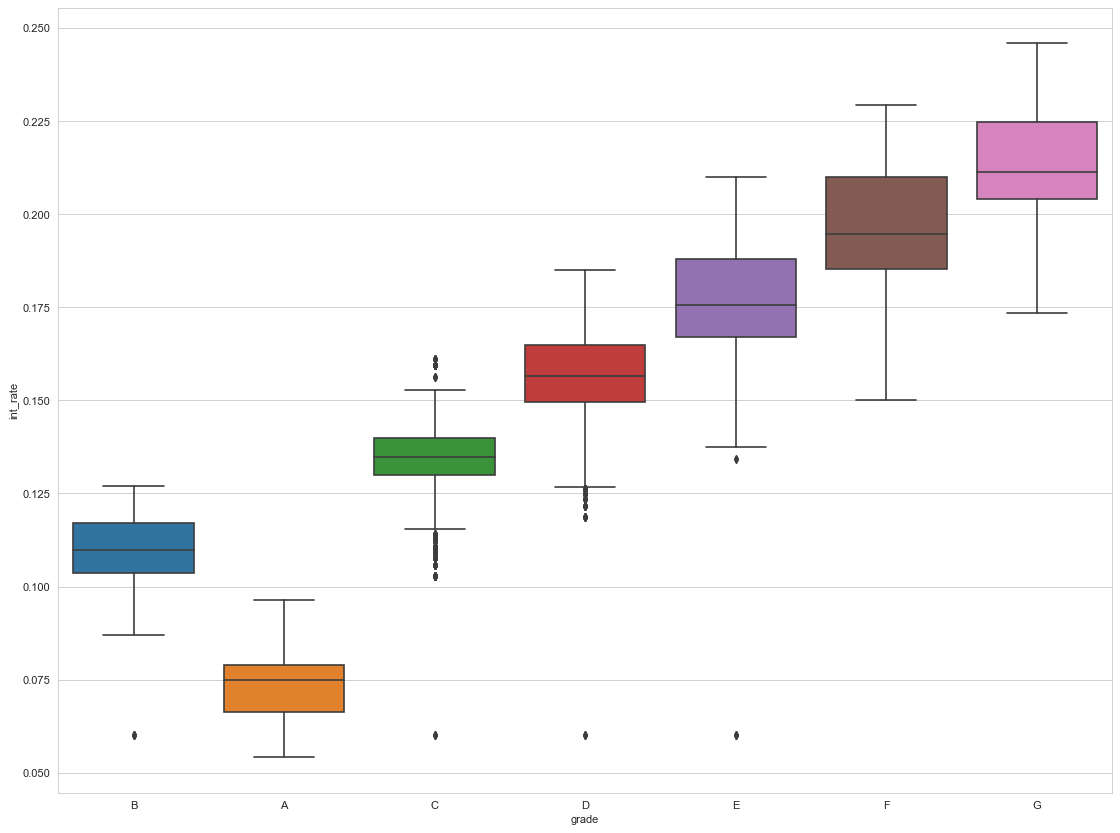

In [19]:
# Box Plot

from matplotlib.pyplot import figure
figure(num=None, figsize=(17, 13), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(x='grade',y='int_rate', data=loan_new, order=loan_new['grade'].value_counts().index)
plt.show()

**Insights :**
As the grade increases from A to G, the interest rate also increases

In [31]:
%%HTML
<div class='tableauPlaceholder' id='viz1561576811203' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561576811203');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
People with Home Ownership type as MORTGAGE, pay more than other ownership types.

In [32]:
%%HTML
<div class='tableauPlaceholder' id='viz1561577184948' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet8' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577184948');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
The average inqyiry in last 6 months for the Charged Off people is more than Fully paid which is turn more than Current.

Charged off > Fully paid > Current

In [33]:
%%HTML
<div class='tableauPlaceholder' id='viz1561577125069' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='aap_15615642362660&#47;Sheet6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;aa&#47;aap_15615642362660&#47;Sheet6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561577125069');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Insights :**
Typically as the no. of years(experience) of an employee increases his annual income also increases.

# CONCLUSIONS :

1. Debt consoldation is the biggest reason for the people to take loans, so more marketing could be done and incentives can be    given to attract larger chunk of people.
2. Around 14% of the people are charged off the loan, so steps can be taken in order to tackle this.
3. As the year increases more and more people are taking loan and due to this the loan amount is also increasing.
   But as the year increases the percentage of people charged off with loan also increases.
4. As the grade increases the int rate also increases
5. With the increase in emp length annual income also tends to increase.
6. As the amount of loan increases the int rate also increases.
7. Verified people are more like to get more amounts of loan.
8. The average enquiry in last 6 months is more for the charged off people

Annual income, Verification Status, int rate, grade are the most important features use to decide the risk factors and influence the loan defaults.